In [1]:
from Generators.BL import BL
from Samplers.IAF_KernelBased import IAF_KernelBased
import numpy as np
import plots

# Example

In [2]:
dur = 0.5

dt = 0.001

f_max = 64

N_c = 3

In [3]:
bl = BL(dur, dt, f_max, N_c)
t, u = bl.generate(normalized=True)

In [4]:
alpha = 1
theta = 0.001

gamma = 0.5
Ts = 1/(10*f_max)

In [5]:
iaf_kernel_based = IAF_KernelBased(alpha, theta, gamma, Ts)

iaf_kernel_based.setSignal(t, u, dt)

spikes = iaf_kernel_based.encode()

u_rec = iaf_kernel_based.decode()

iaf_kernel_based.summary()

Integrate-and-Fire Sampler - KernelBased
From "APPROXIMATE RECONSTRUCTION OF BANDLIMITED FUNCTIONS FOR THE INTEGRATE AND FIRE SAMPLER"
Hans G. Feichtinger, 2009
Status: DECODED
Parameters:
Firing parameter 'alpha': 1
Threshold 'theta': 0.001


/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/scipy/signal/waveforms.py:658: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif idx == 'mid':


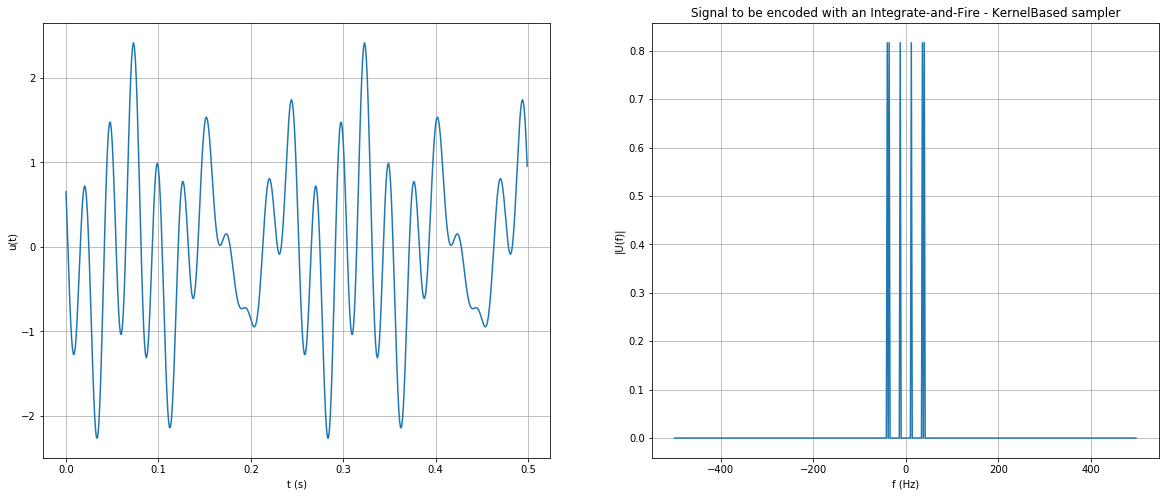

In [6]:
iaf_kernel_based.plotSignal()

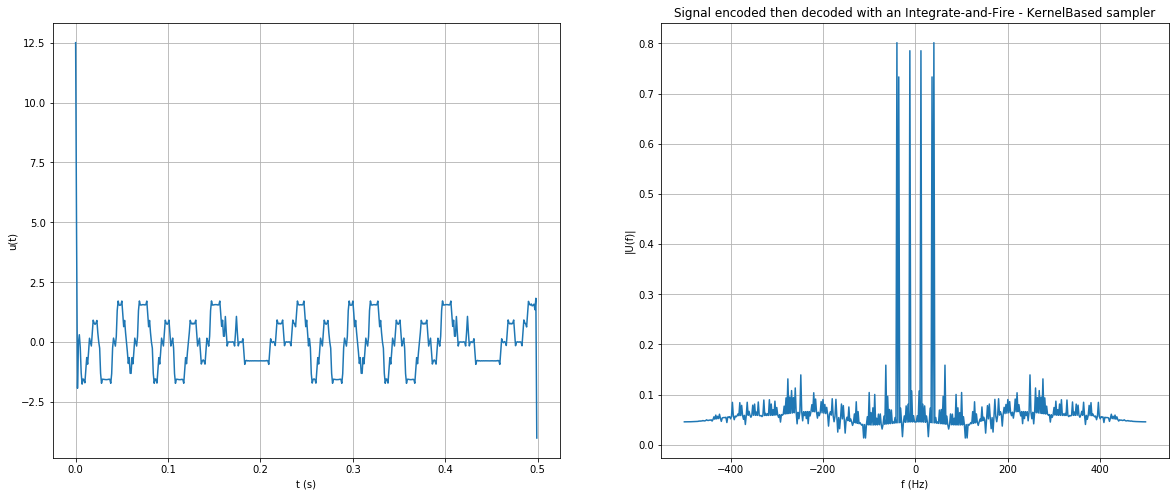

In [7]:
iaf_kernel_based.plotRecoveredSignal()

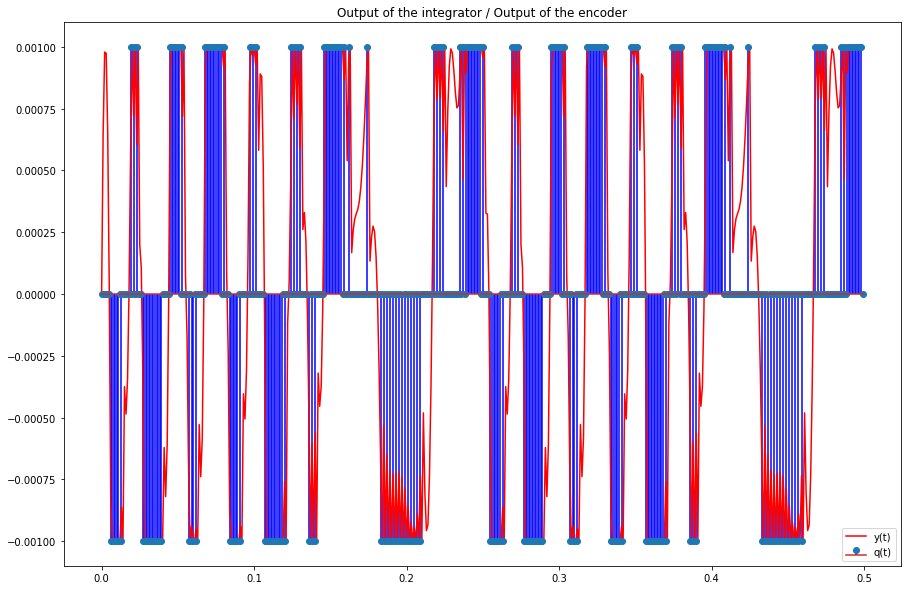

In [8]:
iaf_kernel_based.plotIntegralAndEncoderOutput()

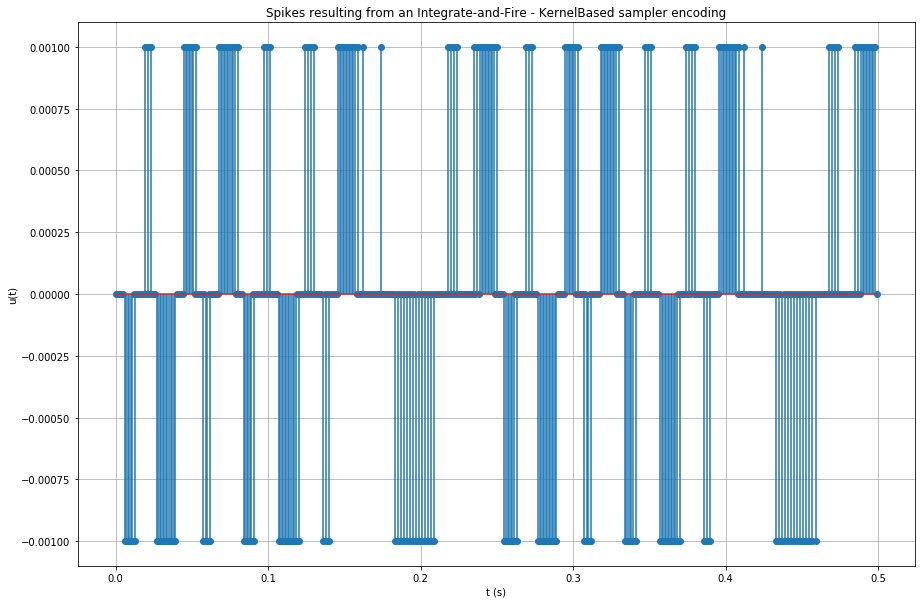

In [9]:
iaf_kernel_based.plotSpikes()

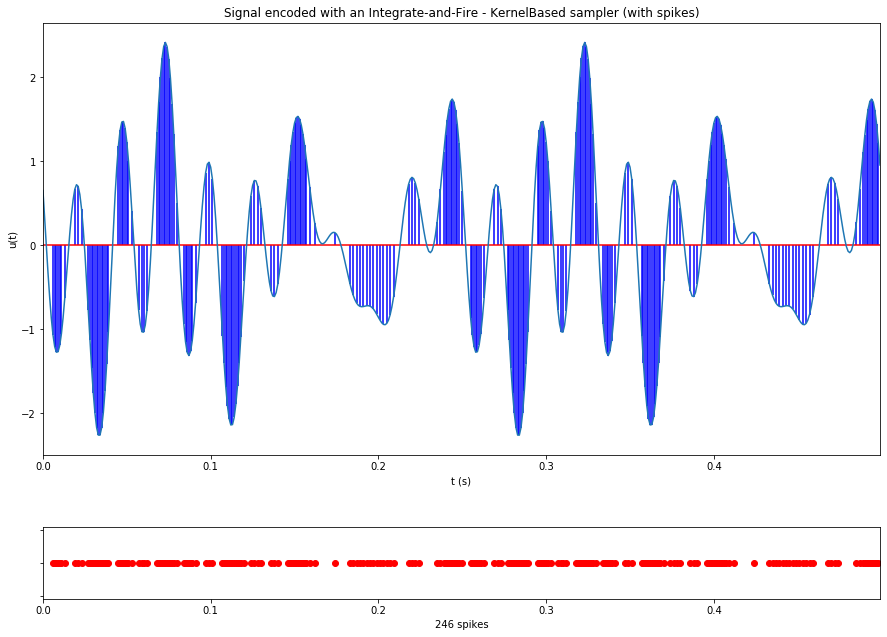

In [10]:
iaf_kernel_based.plotSignalAndSpikes()

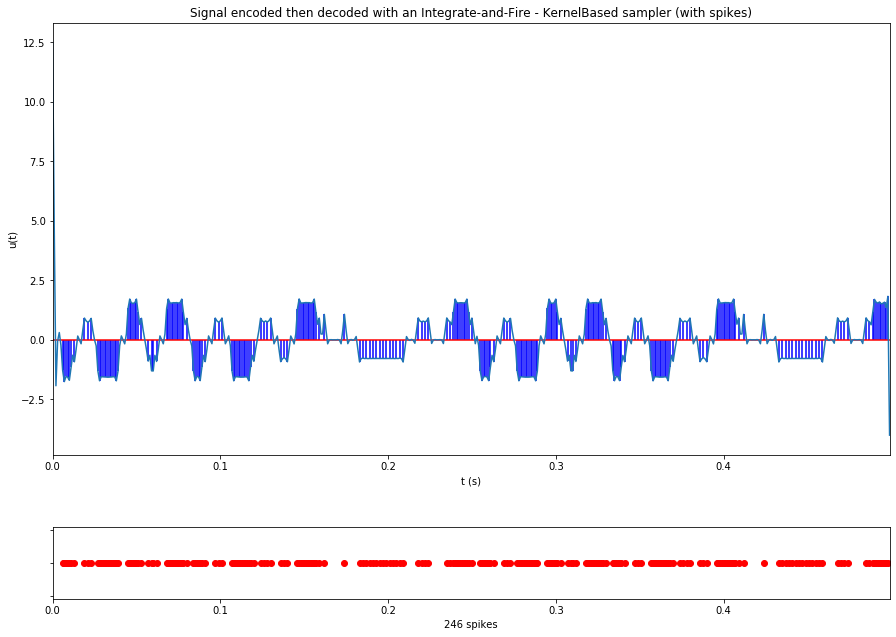

In [11]:
iaf_kernel_based.plotRecoveredSignalAndSpikes()

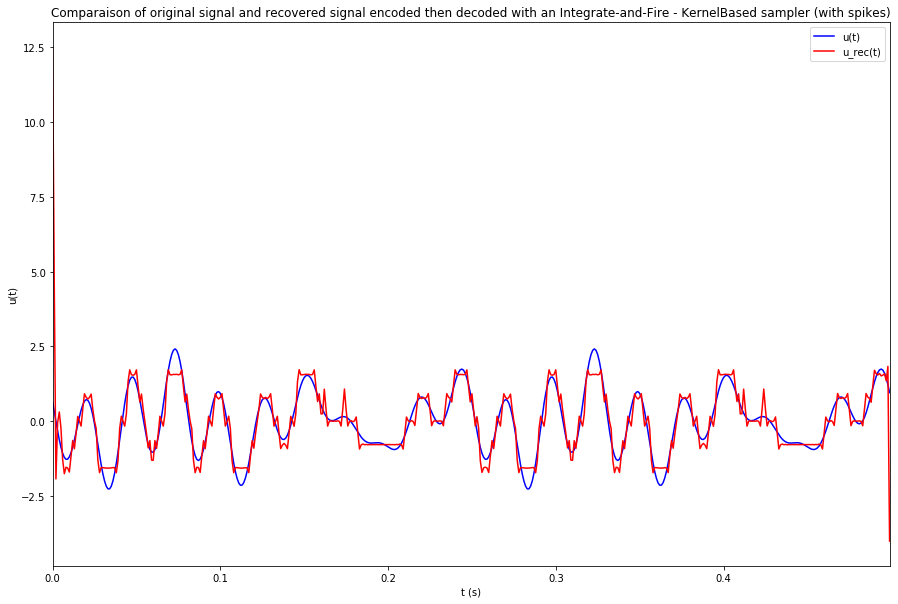

In [12]:
iaf_kernel_based.plotSignalAndRecoveredSignal()

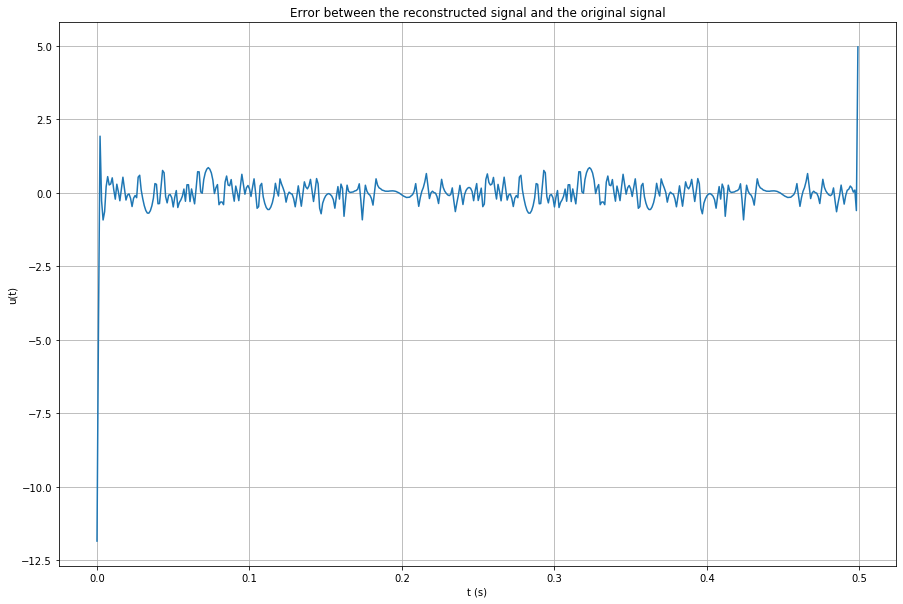

In [13]:
iaf_kernel_based.plotError()

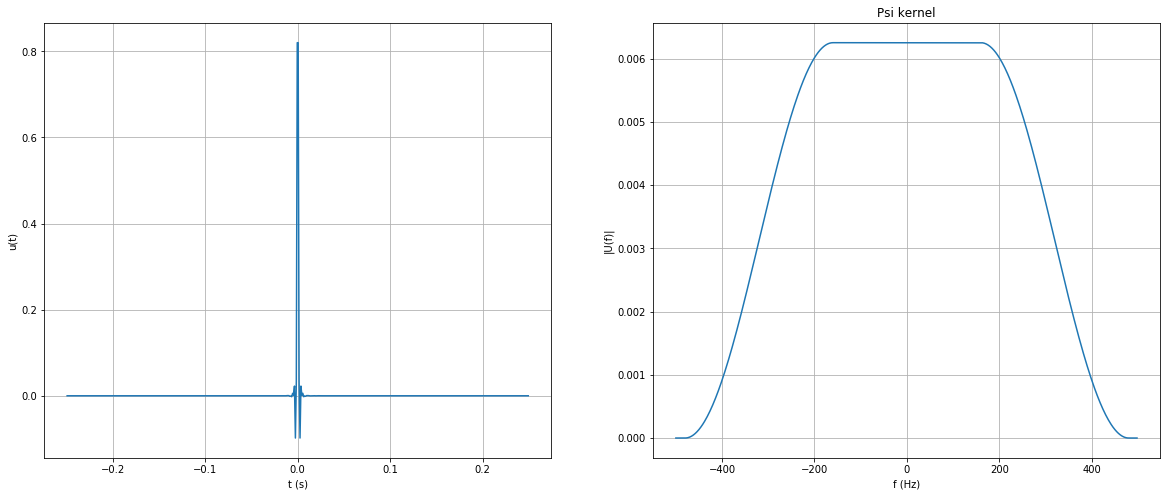

In [14]:
iaf_kernel_based.plotPsiKernel()

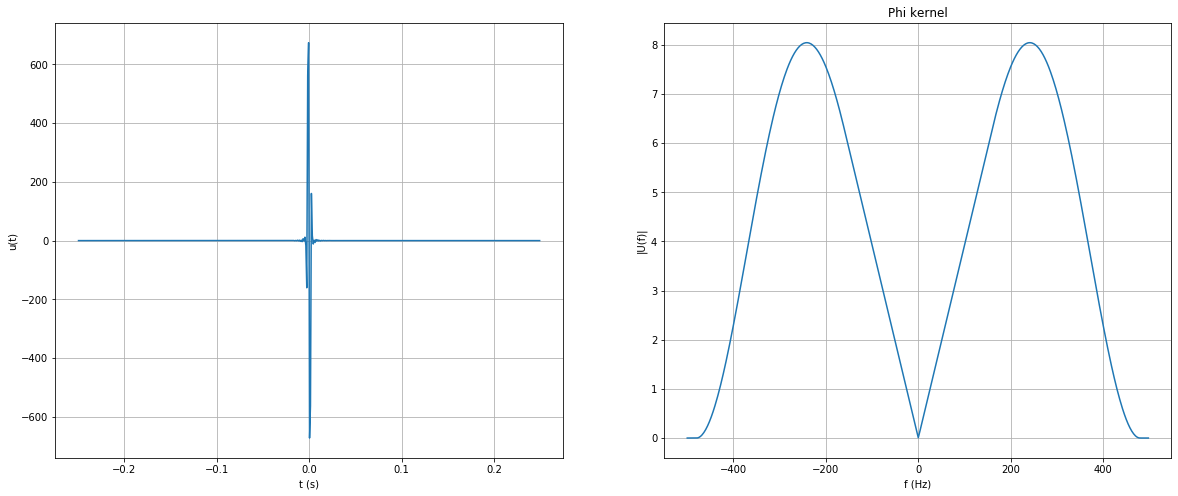

In [15]:
iaf_kernel_based.plotPhiKernel()

In [16]:
print(f'The mean squared error of the signal is : {iaf_kernel_based.computeMeanSquaredError()}')

The mean squared error of the signal is : 240.21176879176136


# Experiments

In [17]:
from numpy.fft import fft, fftfreq, irfft
import matplotlib.pyplot as plt
from scipy import signal

In [18]:
dur = 0.5
dt1 = 0.000005
f_max = 64
N_c = 3

In [19]:
bl = BL(dur, dt1, f_max, N_c)
t1, u1 = bl.generate(normalized = True)
u2, t2 = signal.resample(u1, int(u1.shape[0]/10), t1)
u3, t3 = signal.resample(u2, int(u2.shape[0]/10), t2)
u4, t4 = signal.resample(u3, int(u3.shape[0]/10), t3)
dt2 = dt1 * 10
dt3 = dt2 * 10
dt4 = dt3 * 10

In [20]:
alpha = 1
theta = 0.001

gamma = 0.5
Ts = 1/(f_max)

In [21]:
iaf_kernel_based_1 = IAF_KernelBased(alpha, theta, gamma, Ts)
iaf_kernel_based_1.setSignal(t1, u1, dt1)
iaf_kernel_based_1.encode()
iaf_kernel_based_1.decode()
vtjs_1 = iaf_kernel_based_1.v[np.insert(iaf_kernel_based_1.spikes_idx, 0, 0)]
wjs_1 = iaf_kernel_based_1.ws

In [22]:
iaf_kernel_based_2 = IAF_KernelBased(alpha, theta, gamma, Ts)
iaf_kernel_based_2.setSignal(t2, u2, dt2)
iaf_kernel_based_2.encode()
iaf_kernel_based_2.decode()
vtjs_2 = iaf_kernel_based_2.v[np.insert(iaf_kernel_based_2.spikes_idx, 0, 0)]
wjs_2 = iaf_kernel_based_2.ws

In [23]:
iaf_kernel_based_3 = IAF_KernelBased(alpha, theta, gamma, Ts)
iaf_kernel_based_3.setSignal(t3, u3, dt3)
iaf_kernel_based_3.encode()
iaf_kernel_based_3.decode()
vtjs_3 = iaf_kernel_based_3.v[np.insert(iaf_kernel_based_3.spikes_idx, 0, 0)]
wjs_3 = iaf_kernel_based_3.ws

In [24]:
iaf_kernel_based_4 = IAF_KernelBased(alpha, theta, gamma, Ts)
iaf_kernel_based_4.setSignal(t4, u4, dt4)
iaf_kernel_based_4.encode()
iaf_kernel_based_4.decode()
vtjs_4 = iaf_kernel_based_4.v[np.insert(iaf_kernel_based_4.spikes_idx, 0, 0)]
wjs_4 = iaf_kernel_based_4.ws

No handles with labels found to put in legend.


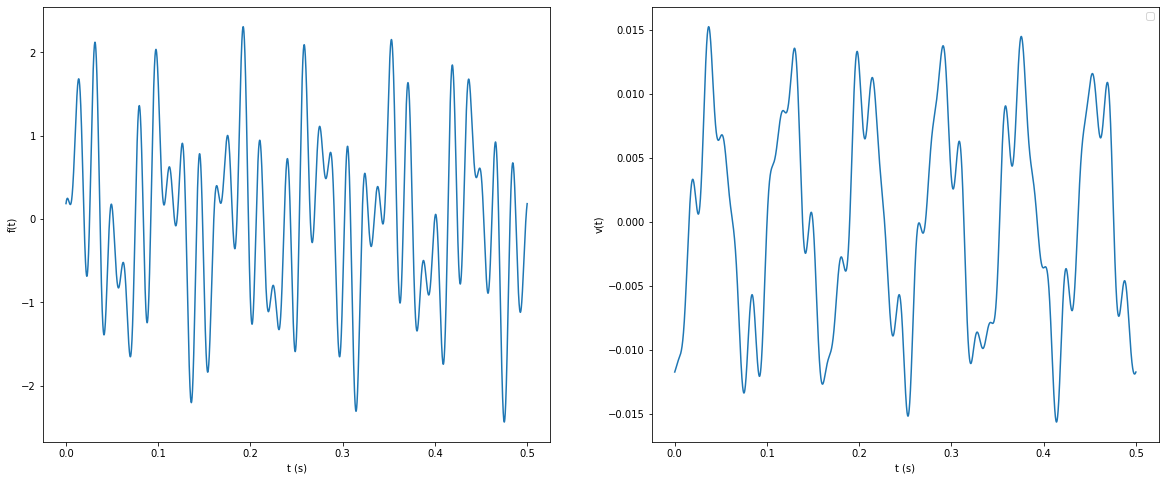

In [25]:
plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
plt.plot(iaf_kernel_based_1.t, iaf_kernel_based_1.u)
plt.xlabel('t (s)')
plt.ylabel('f(t)')
plt.subplot(1, 2, 2)
plt.plot(iaf_kernel_based_1.t, iaf_kernel_based_1.v)
plt.xlabel('t (s)')
plt.ylabel('v(t)')
plt.legend()

plt.savefig('saved_images/fv.png')

## Effect of dt

### On $w_j$s

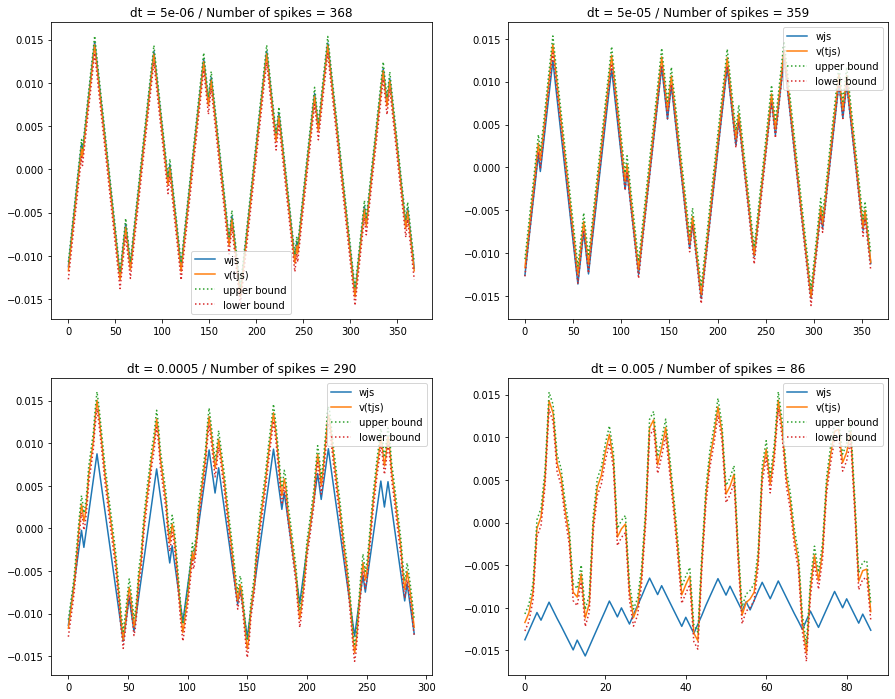

In [26]:
plt.figure(figsize = (15, 12))
plt.subplot(2,2,1)
plt.title(f'dt = {dt1} / Number of spikes = {iaf_kernel_based_1.getNumberOfSpikes()}')
plt.plot(wjs_1 , label = 'wjs')
plt.plot(vtjs_1, label = 'v(tjs)')
plt.plot(vtjs_1 + iaf_kernel_based_1.theta, ':', label = 'upper bound')
plt.plot(vtjs_1 - iaf_kernel_based_1.theta, ':', label = 'lower bound')
plt.legend()
plt.subplot(2,2,2)
plt.title(f'dt = {dt2} / Number of spikes = {iaf_kernel_based_2.getNumberOfSpikes()}')
plt.plot(wjs_2 , label = 'wjs')
plt.plot(vtjs_2, label = 'v(tjs)')
plt.plot(vtjs_2 + iaf_kernel_based_2.theta, ':', label = 'upper bound')
plt.plot(vtjs_2 - iaf_kernel_based_2.theta, ':', label = 'lower bound')
plt.legend()
plt.subplot(2,2,3)
plt.title(f'dt = {dt3} / Number of spikes = {iaf_kernel_based_3.getNumberOfSpikes()}')
plt.plot(wjs_3 , label = 'wjs')
plt.plot(vtjs_3, label = 'v(tjs)')
plt.plot(vtjs_3 + iaf_kernel_based_3.theta, ':', label = 'upper bound')
plt.plot(vtjs_3 - iaf_kernel_based_3.theta, ':', label = 'lower bound')
plt.legend()
plt.subplot(2,2,4)
plt.title(f'dt = {dt4} / Number of spikes = {iaf_kernel_based_4.getNumberOfSpikes()}')
plt.plot(wjs_4 , label = 'wjs')
plt.plot(vtjs_4, label = 'v(tjs)')
plt.plot(vtjs_4 + iaf_kernel_based_4.theta, ':', label = 'upper bound')
plt.plot(vtjs_4 - iaf_kernel_based_4.theta, ':', label = 'lower bound')
plt.legend()

plt.savefig('saved_images/wjs.png')

### On $s_k$s

/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


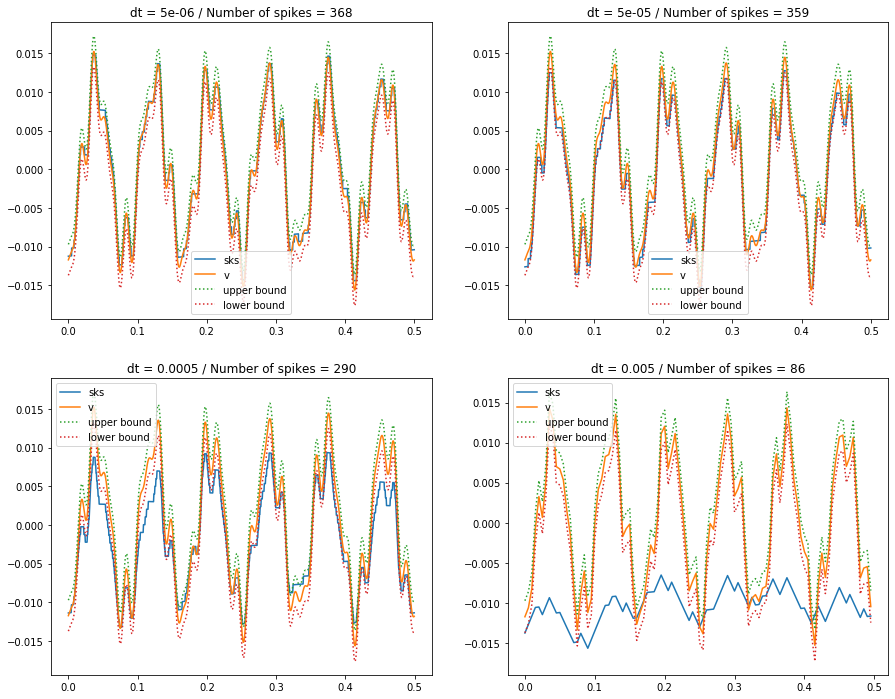

In [27]:
plt.figure(figsize = (15, 12))
plt.subplot(2,2,1)
plt.title(f'dt = {iaf_kernel_based_1.dt} / Number of spikes = {iaf_kernel_based_1.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_1.t, iaf_kernel_based_1.sk , label = 'sks')
plt.plot(iaf_kernel_based_1.t, iaf_kernel_based_1.v, label = 'v')
plt.plot(iaf_kernel_based_1.t, iaf_kernel_based_1.v + 2*iaf_kernel_based_1.theta, ':', label = 'upper bound')
plt.plot(iaf_kernel_based_1.t, iaf_kernel_based_1.v - 2*iaf_kernel_based_1.theta, ':', label = 'lower bound')
plt.legend()
plt.subplot(2,2,2)
plt.title(f'dt = {iaf_kernel_based_2.dt} / Number of spikes = {iaf_kernel_based_2.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_2.t, iaf_kernel_based_2.sk , label = 'sks')
plt.plot(iaf_kernel_based_2.t, iaf_kernel_based_2.v, label = 'v')
plt.plot(iaf_kernel_based_2.t, iaf_kernel_based_2.v + 2*iaf_kernel_based_2.theta, ':', label = 'upper bound')
plt.plot(iaf_kernel_based_2.t, iaf_kernel_based_2.v - 2*iaf_kernel_based_2.theta, ':', label = 'lower bound')
plt.legend()
plt.subplot(2,2,3)
plt.title(f'dt = {iaf_kernel_based_3.dt} / Number of spikes = {iaf_kernel_based_3.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_3.t, iaf_kernel_based_3.sk , label = 'sks')
plt.plot(iaf_kernel_based_3.t, iaf_kernel_based_3.v, label = 'v')
plt.plot(iaf_kernel_based_3.t, iaf_kernel_based_3.v + 2*iaf_kernel_based_3.theta, ':', label = 'upper bound')
plt.plot(iaf_kernel_based_3.t, iaf_kernel_based_3.v - 2*iaf_kernel_based_3.theta, ':', label = 'lower bound')
plt.legend()
plt.subplot(2,2,4)
plt.title(f'dt = {iaf_kernel_based_4.dt} / Number of spikes = {iaf_kernel_based_4.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_4.t, iaf_kernel_based_4.sk , label = 'sks')
plt.plot(iaf_kernel_based_4.t, iaf_kernel_based_4.v, label = 'v')
plt.plot(iaf_kernel_based_4.t, iaf_kernel_based_4.v + 2*iaf_kernel_based_4.theta, ':', label = 'upper bound')
plt.plot(iaf_kernel_based_4.t, iaf_kernel_based_4.v - 2*iaf_kernel_based_4.theta, ':', label = 'lower bound')
plt.legend()

plt.savefig('saved_images/sks.png')

In [28]:
thetas = [0.01, 0.001, 0.0001, 0.00001]
alphas = [0.01, 1, 10, 100]

## Effect of $\theta$

In [29]:
iaf_kernel_based_1_1 = IAF_KernelBased(alpha, thetas[0], gamma, Ts)
iaf_kernel_based_1_1.setSignal(t1, u1, dt1)
iaf_kernel_based_1_1.encode()
iaf_kernel_based_1_1.decode()

array([-1640.92198399, -1640.40796514, -1639.89295113, ...,
         264.65326273,   264.53943455,   264.42538766])

In [30]:
iaf_kernel_based_1_2 = IAF_KernelBased(alpha, thetas[1], gamma, Ts)
iaf_kernel_based_1_2.setSignal(t1, u1, dt1)
iaf_kernel_based_1_2.encode()
iaf_kernel_based_1_2.decode()

array([-1953.65918725, -1952.85082438, -1952.04128813, ...,
        1890.52023089,  1890.69182851,  1890.86250009])

In [31]:
iaf_kernel_based_1_3 = IAF_KernelBased(alpha, thetas[2], gamma, Ts)
iaf_kernel_based_1_3.setSignal(t1, u1, dt1)
iaf_kernel_based_1_3.encode()
iaf_kernel_based_1_3.decode()

array([-1579.95570467, -1579.17175299, -1578.38680549, ...,
        1662.23176653,  1662.45502153,  1662.67744235])

In [32]:
iaf_kernel_based_1_4 = IAF_KernelBased(alpha, thetas[3], gamma, Ts)
iaf_kernel_based_1_4.setSignal(t1, u1, dt1)
iaf_kernel_based_1_4.encode()
iaf_kernel_based_1_4.decode()

array([-1705.27386404, -1704.68131765, -1704.08784357, ...,
        1898.35648139,  1898.56982883,  1898.78228129])

/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


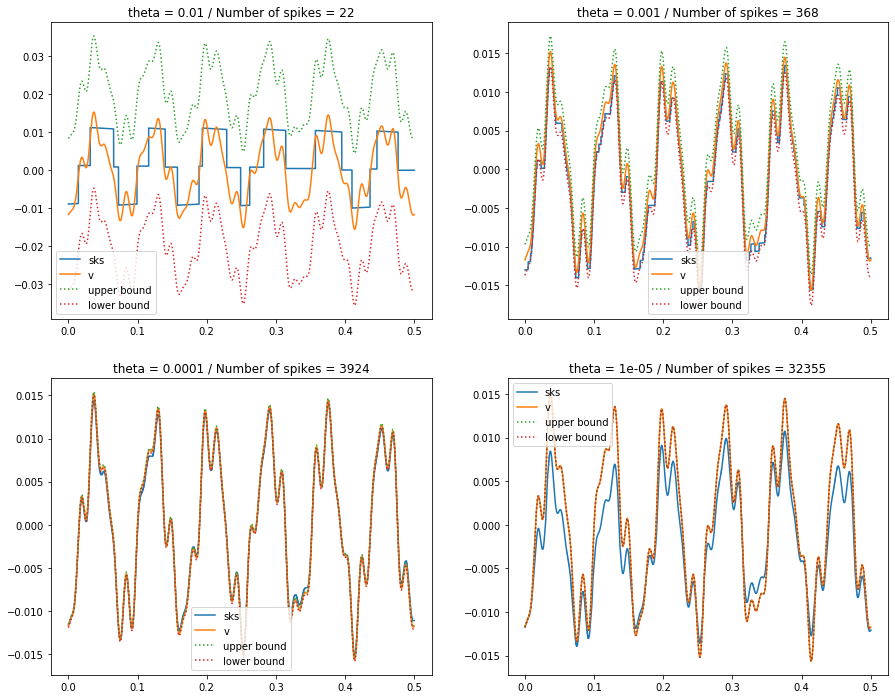

In [33]:
plt.figure(figsize = (15, 12))
plt.subplot(2,2,1)
plt.title(f'theta = {iaf_kernel_based_1_1.theta} / Number of spikes = {iaf_kernel_based_1_1.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_1_1.t, iaf_kernel_based_1_1.sk , label = 'sks')
plt.plot(iaf_kernel_based_1_1.t, iaf_kernel_based_1_1.v, label = 'v')
plt.plot(iaf_kernel_based_1_1.t, iaf_kernel_based_1_1.v + 2*iaf_kernel_based_1_1.theta, ':', label = 'upper bound')
plt.plot(iaf_kernel_based_1_1.t, iaf_kernel_based_1_1.v - 2*iaf_kernel_based_1_1.theta, ':', label = 'lower bound')
plt.legend()
plt.subplot(2,2,2)
plt.title(f'theta = {iaf_kernel_based_1_2.theta} / Number of spikes = {iaf_kernel_based_1_2.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_1_2.t, iaf_kernel_based_1_2.sk , label = 'sks')
plt.plot(iaf_kernel_based_1_2.t, iaf_kernel_based_1_2.v, label = 'v')
plt.plot(iaf_kernel_based_1_2.t, iaf_kernel_based_1_2.v + 2*iaf_kernel_based_1_2.theta, ':', label = 'upper bound')
plt.plot(iaf_kernel_based_1_2.t, iaf_kernel_based_1_2.v - 2*iaf_kernel_based_1_2.theta, ':', label = 'lower bound')
plt.legend()
plt.subplot(2,2,3)
plt.title(f'theta = {iaf_kernel_based_1_3.theta} / Number of spikes = {iaf_kernel_based_1_3.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_1_3.t, iaf_kernel_based_1_3.sk , label = 'sks')
plt.plot(iaf_kernel_based_1_3.t, iaf_kernel_based_1_3.v, label = 'v')
plt.plot(iaf_kernel_based_1_3.t, iaf_kernel_based_1_3.v + 2*iaf_kernel_based_1_3.theta, ':', label = 'upper bound')
plt.plot(iaf_kernel_based_1_3.t, iaf_kernel_based_1_3.v - 2*iaf_kernel_based_1_3.theta, ':', label = 'lower bound')
plt.legend()
plt.subplot(2,2,4)
plt.title(f'theta = {iaf_kernel_based_1_4.theta} / Number of spikes = {iaf_kernel_based_1_4.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_1_4.t, iaf_kernel_based_1_4.sk , label = 'sks')
plt.plot(iaf_kernel_based_1_4.t, iaf_kernel_based_1_4.v, label = 'v')
plt.plot(iaf_kernel_based_1_4.t, iaf_kernel_based_1_4.v + 2*iaf_kernel_based_1_4.theta, ':', label = 'upper bound')
plt.plot(iaf_kernel_based_1_4.t, iaf_kernel_based_1_4.v - 2*iaf_kernel_based_1_4.theta, ':', label = 'lower bound')
plt.legend()

plt.savefig('saved_images/thetas.png')

## Effect of $\alpha$

In [34]:
iaf_kernel_based_1_2_1 = IAF_KernelBased(alphas[0], thetas[1], gamma, Ts)
iaf_kernel_based_1_2_1.setSignal(t1, u1, dt1)
iaf_kernel_based_1_2_1.encode()
iaf_kernel_based_1_2_1.decode()

array([-1867.21424432, -1866.40585267, -1865.59632087, ...,
        1918.93398929,  1919.10413503,  1919.27334417])

In [35]:
iaf_kernel_based_1_2_2 = IAF_KernelBased(alphas[1], thetas[1], gamma, Ts)
iaf_kernel_based_1_2_2.setSignal(t1, u1, dt1)
iaf_kernel_based_1_2_2.encode()
iaf_kernel_based_1_2_2.decode()

array([-1854.15523735, -1853.34689362, -1852.5374148 , ...,
        1830.16813901,  1830.33967858,  1830.51031532])

In [36]:
iaf_kernel_based_1_2_3 = IAF_KernelBased(alphas[2], thetas[1], gamma, Ts)
iaf_kernel_based_1_2_3.setSignal(t1, u1, dt1)
iaf_kernel_based_1_2_3.encode()
iaf_kernel_based_1_2_3.decode()

array([-1692.48082809, -1691.67448222, -1690.86706292, ...,
        1669.1984289 ,  1669.36729015,  1669.53531237])

In [37]:
iaf_kernel_based_1_2_4 = IAF_KernelBased(alphas[3], thetas[1], gamma, Ts)
iaf_kernel_based_1_2_4.setSignal(t1, u1, dt1)
iaf_kernel_based_1_2_4.encode()
iaf_kernel_based_1_2_4.decode()

array([-130.34274747, -129.58990672, -128.83662002, ...,  405.91599546,
        406.02531027,  406.13428573])

/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


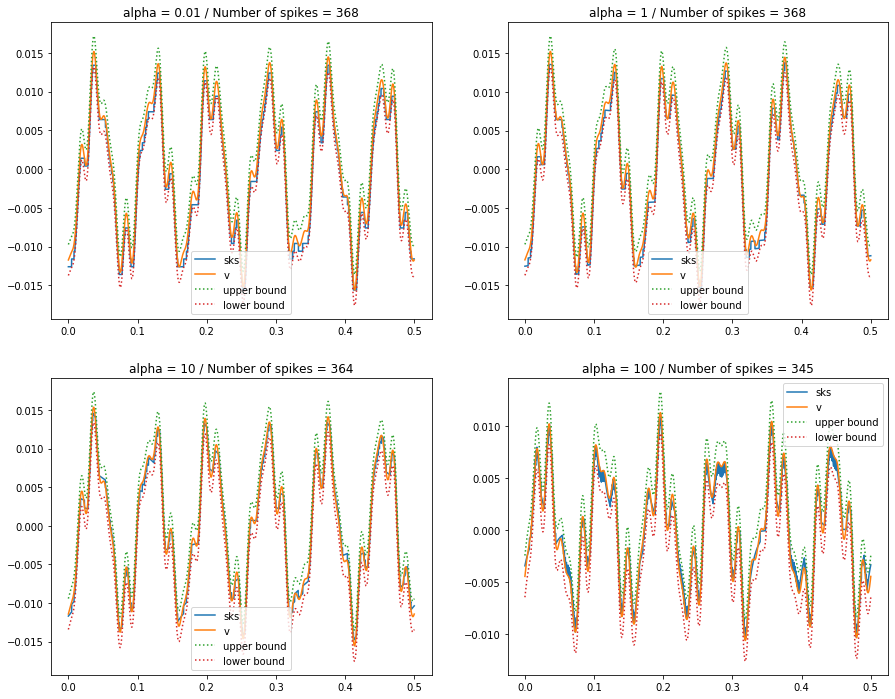

In [38]:
plt.figure(figsize = (15, 12))
plt.subplot(2,2,1)
plt.title(f'alpha = {iaf_kernel_based_1_2_1.alpha} / Number of spikes = {iaf_kernel_based_1_2_1.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_1_2_1.t, iaf_kernel_based_1_2_1.sk , label = 'sks')
plt.plot(iaf_kernel_based_1_2_1.t, iaf_kernel_based_1_2_1.v, label = 'v')
plt.plot(iaf_kernel_based_1_2_1.t, iaf_kernel_based_1_2_1.v + 2*iaf_kernel_based_1_2_1.theta, ':', label = 'upper bound')
plt.plot(iaf_kernel_based_1_2_1.t, iaf_kernel_based_1_2_1.v - 2*iaf_kernel_based_1_2_1.theta, ':', label = 'lower bound')
plt.legend()
plt.subplot(2,2,2)
plt.title(f'alpha = {iaf_kernel_based_1_2_2.alpha} / Number of spikes = {iaf_kernel_based_1_2_2.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_1_2_2.t, iaf_kernel_based_1_2_2.sk , label = 'sks')
plt.plot(iaf_kernel_based_1_2_2.t, iaf_kernel_based_1_2_2.v, label = 'v')
plt.plot(iaf_kernel_based_1_2_2.t, iaf_kernel_based_1_2_2.v + 2*iaf_kernel_based_1_2_2.theta, ':', label = 'upper bound')
plt.plot(iaf_kernel_based_1_2_2.t, iaf_kernel_based_1_2_2.v - 2*iaf_kernel_based_1_2_2.theta, ':', label = 'lower bound')
plt.legend()
plt.subplot(2,2,3)
plt.title(f'alpha = {iaf_kernel_based_1_2_3.alpha} / Number of spikes = {iaf_kernel_based_1_2_3.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_1_2_3.t, iaf_kernel_based_1_2_3.sk , label = 'sks')
plt.plot(iaf_kernel_based_1_2_3.t, iaf_kernel_based_1_2_3.v, label = 'v')
plt.plot(iaf_kernel_based_1_2_3.t, iaf_kernel_based_1_2_3.v + 2*iaf_kernel_based_1_2_3.theta, ':', label = 'upper bound')
plt.plot(iaf_kernel_based_1_2_3.t, iaf_kernel_based_1_2_3.v - 2*iaf_kernel_based_1_2_3.theta, ':', label = 'lower bound')
plt.legend()
plt.subplot(2,2,4)
plt.title(f'alpha = {iaf_kernel_based_1_2_4.alpha} / Number of spikes = {iaf_kernel_based_1_2_4.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_1_2_4.t, iaf_kernel_based_1_2_4.sk , label = 'sks')
plt.plot(iaf_kernel_based_1_2_4.t, iaf_kernel_based_1_2_4.v, label = 'v')
plt.plot(iaf_kernel_based_1_2_4.t, iaf_kernel_based_1_2_4.v + 2*iaf_kernel_based_1_2_4.theta, ':', label = 'upper bound')
plt.plot(iaf_kernel_based_1_2_4.t, iaf_kernel_based_1_2_4.v - 2*iaf_kernel_based_1_2_4.theta, ':', label = 'lower bound')
plt.legend()

plt.savefig('saved_images/alphas_good.png')

In [39]:
iaf_kernel_based_1_2_1 = IAF_KernelBased(alphas[0], thetas[0], gamma, Ts)
iaf_kernel_based_1_2_1.setSignal(t1, u1, dt1)
iaf_kernel_based_1_2_1.encode()
iaf_kernel_based_1_2_1.decode()

array([-1893.70397822, -1893.18900178, -1892.67293266, ...,
         299.20918986,   299.09653233,   298.98364024])

In [40]:
iaf_kernel_based_1_2_2 = IAF_KernelBased(alphas[1], thetas[0], gamma, Ts)
iaf_kernel_based_1_2_2.setSignal(t1, u1, dt1)
iaf_kernel_based_1_2_2.encode()
iaf_kernel_based_1_2_2.decode()

array([-2307.98874715, -2307.47459998, -2306.95920099, ...,
         669.24900616,   669.13556715,   669.02175376])

In [41]:
iaf_kernel_based_1_2_3 = IAF_KernelBased(alphas[2], thetas[0], gamma, Ts)
iaf_kernel_based_1_2_3.setSignal(t1, u1, dt1)
iaf_kernel_based_1_2_3.encode()
iaf_kernel_based_1_2_3.decode()

array([-1201.23683184, -1200.73126662, -1200.22487351, ...,
       -1084.68209137, -1084.68587415, -1084.68924417])

In [42]:
iaf_kernel_based_1_2_4 = IAF_KernelBased(alphas[3], thetas[0], gamma, Ts)
iaf_kernel_based_1_2_4.setSignal(t1, u1, dt1)
iaf_kernel_based_1_2_4.encode()
iaf_kernel_based_1_2_4.decode()

array([-2.44372574e+03, -2.44376613e+03, -2.44380569e+03, ...,
       -5.45479149e-01, -5.45780969e-01, -5.46082394e-01])

/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


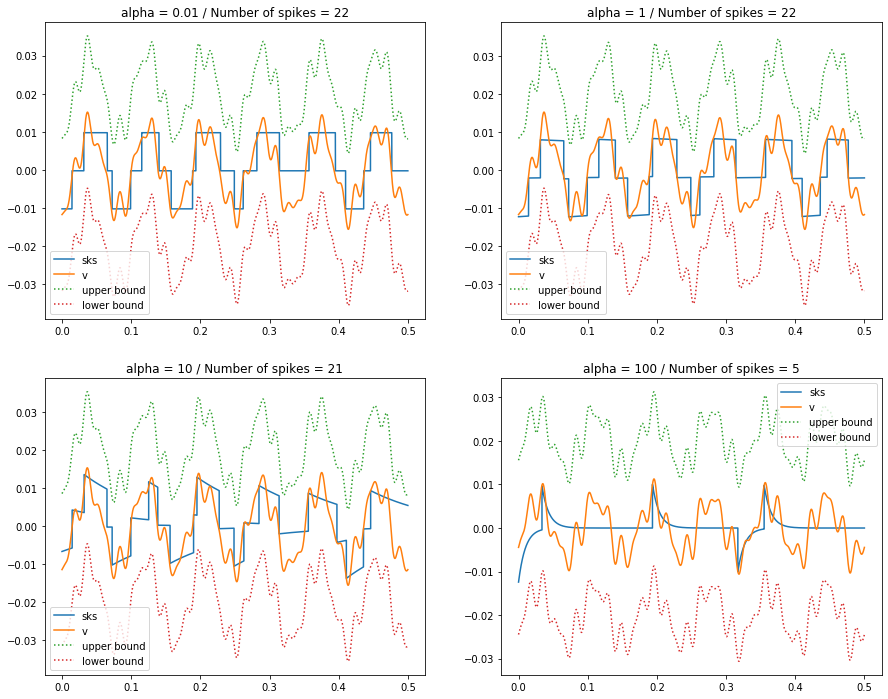

In [43]:
plt.figure(figsize = (15, 12))
plt.subplot(2,2,1)
plt.title(f'alpha = {iaf_kernel_based_1_2_1.alpha} / Number of spikes = {iaf_kernel_based_1_2_1.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_1_2_1.t, iaf_kernel_based_1_2_1.sk , label = 'sks')
plt.plot(iaf_kernel_based_1_2_1.t, iaf_kernel_based_1_2_1.v, label = 'v')
plt.plot(iaf_kernel_based_1_2_1.t, iaf_kernel_based_1_2_1.v + 2*iaf_kernel_based_1_2_1.theta, ':', label = 'upper bound')
plt.plot(iaf_kernel_based_1_2_1.t, iaf_kernel_based_1_2_1.v - 2*iaf_kernel_based_1_2_1.theta, ':', label = 'lower bound')
plt.legend()
plt.subplot(2,2,2)
plt.title(f'alpha = {iaf_kernel_based_1_2_2.alpha} / Number of spikes = {iaf_kernel_based_1_2_2.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_1_2_2.t, iaf_kernel_based_1_2_2.sk , label = 'sks')
plt.plot(iaf_kernel_based_1_2_2.t, iaf_kernel_based_1_2_2.v, label = 'v')
plt.plot(iaf_kernel_based_1_2_2.t, iaf_kernel_based_1_2_2.v + 2*iaf_kernel_based_1_2_2.theta, ':', label = 'upper bound')
plt.plot(iaf_kernel_based_1_2_2.t, iaf_kernel_based_1_2_2.v - 2*iaf_kernel_based_1_2_2.theta, ':', label = 'lower bound')
plt.legend()
plt.subplot(2,2,3)
plt.title(f'alpha = {iaf_kernel_based_1_2_3.alpha} / Number of spikes = {iaf_kernel_based_1_2_3.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_1_2_3.t, iaf_kernel_based_1_2_3.sk , label = 'sks')
plt.plot(iaf_kernel_based_1_2_3.t, iaf_kernel_based_1_2_3.v, label = 'v')
plt.plot(iaf_kernel_based_1_2_3.t, iaf_kernel_based_1_2_3.v + 2*iaf_kernel_based_1_2_3.theta, ':', label = 'upper bound')
plt.plot(iaf_kernel_based_1_2_3.t, iaf_kernel_based_1_2_3.v - 2*iaf_kernel_based_1_2_3.theta, ':', label = 'lower bound')
plt.legend()
plt.subplot(2,2,4)
plt.title(f'alpha = {iaf_kernel_based_1_2_4.alpha} / Number of spikes = {iaf_kernel_based_1_2_4.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_1_2_4.t, iaf_kernel_based_1_2_4.sk , label = 'sks')
plt.plot(iaf_kernel_based_1_2_4.t, iaf_kernel_based_1_2_4.v, label = 'v')
plt.plot(iaf_kernel_based_1_2_4.t, iaf_kernel_based_1_2_4.v + 2*iaf_kernel_based_1_2_4.theta, ':', label = 'upper bound')
plt.plot(iaf_kernel_based_1_2_4.t, iaf_kernel_based_1_2_4.v - 2*iaf_kernel_based_1_2_4.theta, ':', label = 'lower bound')
plt.legend()

plt.savefig('saved_images/alphas_bad.png')

## Reconstruction

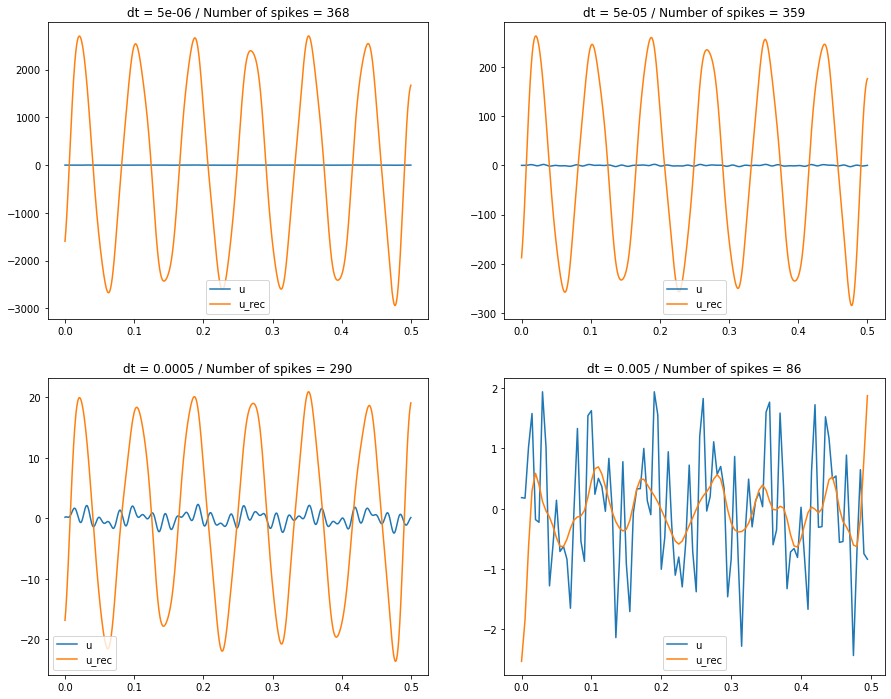

In [44]:
plt.figure(figsize = (15, 12))
plt.subplot(2,2,1)
plt.title(f'dt = {iaf_kernel_based_1.dt} / Number of spikes = {iaf_kernel_based_1.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_1.t, iaf_kernel_based_1.u , label = 'u')
plt.plot(iaf_kernel_based_1.t, iaf_kernel_based_1.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(2,2,2)
plt.title(f'dt = {iaf_kernel_based_2.dt} / Number of spikes = {iaf_kernel_based_2.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_2.t, iaf_kernel_based_2.u , label = 'u')
plt.plot(iaf_kernel_based_2.t, iaf_kernel_based_2.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(2,2,3)
plt.title(f'dt = {iaf_kernel_based_3.dt} / Number of spikes = {iaf_kernel_based_3.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_3.t, iaf_kernel_based_3.u , label = 'u')
plt.plot(iaf_kernel_based_3.t, iaf_kernel_based_3.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(2,2,4)
plt.title(f'dt = {iaf_kernel_based_4.dt} / Number of spikes = {iaf_kernel_based_4.getNumberOfSpikes()}')
plt.plot(iaf_kernel_based_4.t, iaf_kernel_based_4.u , label = 'u')
plt.plot(iaf_kernel_based_4.t, iaf_kernel_based_4.u_rec, label = 'u_rec')
plt.legend()

plt.savefig('saved_images/reconstruct_dt_effect.png')

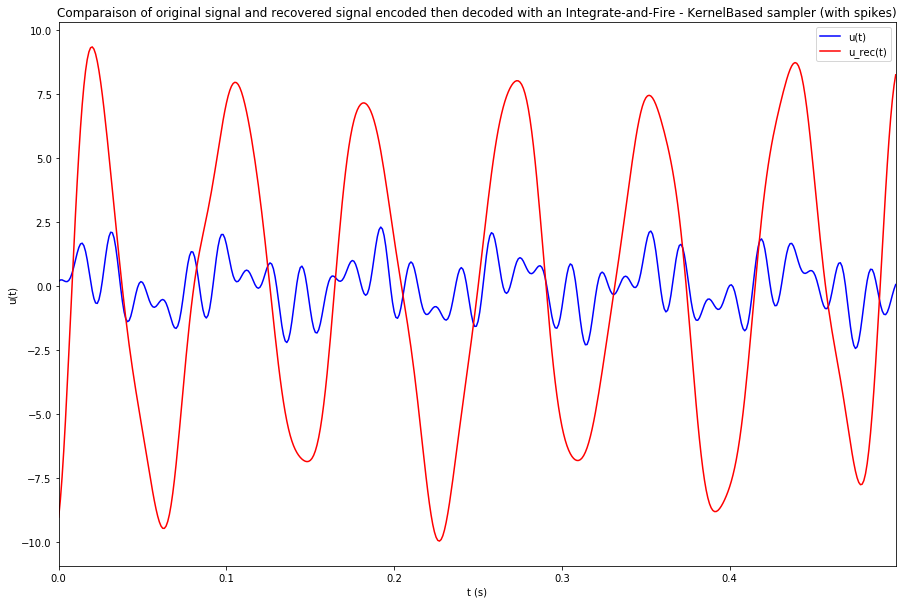

In [45]:
u5, t5 = signal.resample(u3, int(u3.shape[0]/2), t3)
dt5 = dt3 * 2

iaf_kernel_based_5 = IAF_KernelBased(alpha, theta, gamma, Ts)
iaf_kernel_based_5.setSignal(t5, u5, dt5)
iaf_kernel_based_5.encode()
iaf_kernel_based_5.decode()

iaf_kernel_based_5.plotSignalAndRecoveredSignal()

## Effect of $\gamma$

In [46]:
gammas = [0.125, 0.5, 0.625, 1]
Tss = [Ts/2, Ts/5, Ts/10, Ts/13]

In [47]:
iaf_kernel_based_5_1 = IAF_KernelBased(alpha, theta, gammas[0], Ts)
iaf_kernel_based_5_1.setSignal(t5, u5, dt5)
iaf_kernel_based_5_1.encode()
iaf_kernel_based_5_1.decode()

array([-8.61506450e+00, -7.98347828e+00, -7.18670383e+00, -6.23871127e+00,
       -5.15757433e+00, -3.96475058e+00, -2.68422311e+00, -1.34237813e+00,
        3.29815721e-02,  1.41339898e+00,  2.77053859e+00,  4.07695761e+00,
        5.30681001e+00,  6.43656342e+00,  7.44527897e+00,  8.31568275e+00,
        9.03426452e+00,  9.59156150e+00,  9.98228801e+00,  1.02053410e+01,
        1.02636711e+01,  1.01640641e+01,  9.91674082e+00,  9.53521970e+00,
        9.03494251e+00,  8.43378278e+00,  7.75059428e+00,  7.00483569e+00,
        6.21567154e+00,  5.40214939e+00,  4.58161298e+00,  3.77023762e+00,
        2.98157924e+00,  2.22703617e+00,  1.51566099e+00,  8.53235405e-01,
        2.43341992e-01, -3.13606113e-01, -8.19093777e-01, -1.27729237e+00,
       -1.69363706e+00, -2.07546133e+00, -2.43078697e+00, -2.76807000e+00,
       -3.09575475e+00, -3.42207606e+00, -3.75412452e+00, -4.09770280e+00,
       -4.45704282e+00, -4.83459847e+00, -5.23085725e+00, -5.64406670e+00,
       -6.07102532e+00, -

In [48]:
iaf_kernel_based_5_2 = IAF_KernelBased(alpha, theta, gammas[1], Ts)
iaf_kernel_based_5_2.setSignal(t5, u5, dt5)
iaf_kernel_based_5_2.encode()
iaf_kernel_based_5_2.decode()

array([-9.18997054, -8.50457105, -7.63428598, -6.60020911, -5.42825876,
       -4.14808635, -2.79185948, -1.39303036,  0.01494241,  1.39979433,
        2.73153769,  3.98337977,  5.13244133,  6.1602528 ,  7.05300388,
        7.80161482,  8.40155113,  8.85247272,  9.15773836,  9.32380738,
        9.35958309,  9.27574145,  9.08408538,  8.79697455,  8.42677755,
        7.98553881,  7.4846453 ,  6.93466549,  6.34525595,  5.72521358,
        5.0824765 ,  4.42428708,  3.75723946,  3.08742661,  2.42051088,
        1.76170422,  1.11581226,  0.48710544, -0.12072133, -0.70473986,
       -1.2628594 , -1.79400927, -2.29817509, -2.77644303, -3.23095875,
       -3.6648223 , -4.0818525 , -4.48632138, -4.8826081 , -5.27480735,
       -5.66631763, -6.059423  , -6.45497905, -6.85205851, -7.24780642,
       -7.63733706, -8.01384504, -8.36874566, -8.69207813, -8.97291971,
       -9.19996098, -9.36213187, -9.44927183, -9.45273849, -9.3660083 ,
       -9.18516571, -8.90926125, -8.54051089, -8.08431915, -7.54

In [49]:
iaf_kernel_based_5_3 = IAF_KernelBased(alpha, theta, gammas[2], Ts)
iaf_kernel_based_5_3.setSignal(t5, u5, dt5)
iaf_kernel_based_5_3.encode()
iaf_kernel_based_5_3.decode()

array([-3.76965461e+09, -3.00179471e+09, -2.23470229e+09, -1.46837658e+09,
       -7.02816805e+08,  6.19777881e+07,  6.19158426e+07,  6.18539590e+07,
        6.17921372e+07,  6.17303772e+07,  6.16686789e+07, -7.02485084e+08,
       -7.01782949e+08, -1.40466439e+10, -1.40326042e+10, -1.40185787e+10,
       -1.32404750e+10, -1.11336833e+10, -1.03584630e+10, -9.58401760e+09,
       -8.81034625e+09, -6.70798247e+09, -5.93718571e+09, -3.83769366e+09,
       -2.50439217e+09, -1.17242331e+09,  1.58214237e+08,  7.23429689e+08,
        1.28808021e+09,  1.85216636e+09,  2.41568870e+09,  1.64918210e+09,
        1.64753374e+09,  8.81794900e+08,  8.80913545e+08,  8.80033071e+08,
       -4.50312236e+08, -4.49862150e+08, -4.49412513e+08, -4.48963326e+08,
       -4.48514588e+08,  8.81399415e+08,  2.20998417e+09,  2.77314888e+09,
        4.09984283e+09,  4.66111862e+09,  5.98592554e+09,  6.54531620e+09,
        7.86823986e+09,  7.09628343e+09,  7.08919069e+09,  6.31801292e+09,
        4.98223235e+09,  

In [50]:
iaf_kernel_based_5_4 = IAF_KernelBased(alpha, theta, gammas[3], Ts)
iaf_kernel_based_5_4.setSignal(t5, u5, dt5)
iaf_kernel_based_5_4.encode()
iaf_kernel_based_5_4.decode()

array([ -8.55060599,  -7.84315728,  -6.85172482,  -5.6107385 ,
        -4.16952623,  -2.5892949 ,  -0.93913744,   0.70861623,
         2.28335653,   3.72103738,   4.96850516,   5.9869492 ,
         6.75418341,   7.26557012,   7.53351282,   7.58559099,
         7.46149141,   7.20903504,   6.87965758,   6.52374961,
         6.18626863,   5.90300371,   5.69780691,   5.58101509,
         5.54914946,   5.58592415,   5.66437881,   5.74994936,
         5.80414694,   5.78851585,   5.66846117,   5.41666227,
         5.01571664,   4.4598589 ,   3.75559196,   2.92120757,
         1.98531099,   0.9844505 ,  -0.03985571,  -1.0444858 ,
        -1.98811751,  -2.83444693,  -3.55490761,  -4.13072876,
        -4.55417055,  -4.82887313,  -4.96930386,  -4.99939535,
        -4.95048505,  -4.85873176,  -4.76221165,  -4.69790672,
        -4.6988221 ,  -4.79138973,  -4.9933894 ,  -5.31247831,
        -5.7454638 ,  -6.27831879,  -6.88699808,  -7.53894434,
        -8.19523064,  -8.8131822 ,  -9.34931389,  -9.76

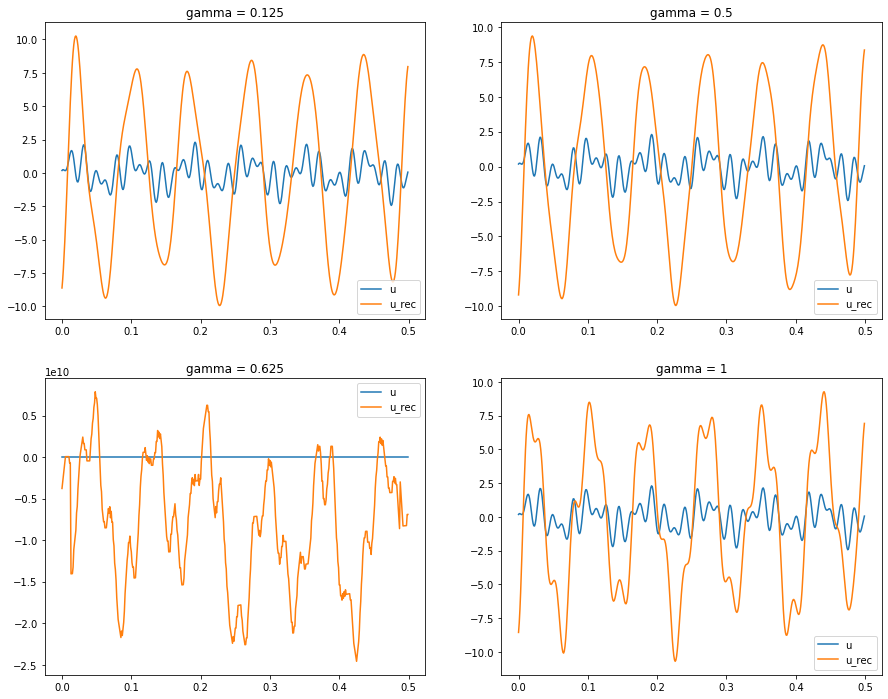

In [51]:
plt.figure(figsize = (15, 12))
plt.subplot(2,2,1)
plt.title(f'gamma = {iaf_kernel_based_5_1.gamma}')
plt.plot(iaf_kernel_based_5_1.t, iaf_kernel_based_5_1.u , label = 'u')
plt.plot(iaf_kernel_based_5_1.t, iaf_kernel_based_5_1.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(2,2,2)
plt.title(f'gamma = {iaf_kernel_based_5_2.gamma}')
plt.plot(iaf_kernel_based_5_2.t, iaf_kernel_based_5_2.u , label = 'u')
plt.plot(iaf_kernel_based_5_2.t, iaf_kernel_based_5_2.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(2,2,3)
plt.title(f'gamma = {iaf_kernel_based_5_3.gamma}')
plt.plot(iaf_kernel_based_5_3.t, iaf_kernel_based_5_3.u , label = 'u')
plt.plot(iaf_kernel_based_5_3.t, iaf_kernel_based_5_3.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(2,2,4)
plt.title(f'gamma = {iaf_kernel_based_5_4.gamma}')
plt.plot(iaf_kernel_based_5_4.t, iaf_kernel_based_5_4.u , label = 'u')
plt.plot(iaf_kernel_based_5_4.t, iaf_kernel_based_5_4.u_rec, label = 'u_rec')
plt.legend()

## Effect of $T_s$

In [52]:
iaf_kernel_based_5_2_1 = IAF_KernelBased(alpha, theta, gamma, Tss[0])
iaf_kernel_based_5_2_1.setSignal(t5, u5, dt5)
iaf_kernel_based_5_2_1.encode()
iaf_kernel_based_5_2_1.decode()

array([-11.04413694, -10.53573195,  -9.30392409,  -7.44765513,
        -5.12878248,  -2.54863102,   0.0790602 ,   2.55399767,
         4.70994366,   6.42746479,   7.63810464,   8.32107752,
         8.49491976,   8.20712678,   7.52457224,   6.5266135 ,
         5.30144805,   3.94501998,   2.56079911,   1.25839988,
         0.14932696,  -0.66096891,  -1.08431855,  -1.06271745,
        -0.58037505,   0.32793552,   1.57462862,   3.02468819,
         4.5087644 ,   5.84262658,   6.85026385,   7.38722123,
         7.36045784,   6.74162445,   5.57159841,   3.95554836,
         2.04932971,   0.03922813,  -1.88186505,  -3.53846161,
        -4.79327186,  -5.56212606,  -5.8212088 ,  -5.60606814,
        -5.00298027,  -4.13430586,  -3.14019184,  -2.15938216,
        -1.31182772,  -0.68539543,  -0.32825986,  -0.24764979,
        -0.41467972,  -0.77404299,  -1.25676425,  -1.79372255,
        -2.32771856,  -2.82209624,  -3.26466344,  -3.66635585,
        -4.05508422,  -4.46595866,  -4.92972893,  -5.46

In [53]:
iaf_kernel_based_5_2_2 = IAF_KernelBased(alpha, theta, gamma, Tss[1])
iaf_kernel_based_5_2_2.setSignal(t5, u5, dt5)
iaf_kernel_based_5_2_2.encode()
iaf_kernel_based_5_2_2.decode()

array([-1.30325763e+01, -1.04966752e+01, -4.75123935e+00,  4.77659731e-01,
        2.64618760e+00,  2.06335057e+00,  7.74633240e-01,  3.55972691e-01,
        9.23250109e-01,  1.78158498e+00,  2.42692809e+00,  2.82623979e+00,
        3.11302912e+00,  3.33044698e+00,  3.42324046e+00,  3.29431291e+00,
        2.84751663e+00,  2.08115985e+00,  1.16667102e+00,  3.60136241e-01,
       -2.01060818e-01, -5.73445906e-01, -8.62540513e-01, -1.04947896e+00,
       -9.92419568e-01, -5.68360395e-01,  2.12749229e-01,  1.19809892e+00,
        2.15343207e+00,  2.86366029e+00,  3.24197299e+00,  3.36235982e+00,
        3.35355041e+00,  3.24261983e+00,  2.91927548e+00,  2.25832712e+00,
        1.25323955e+00,  2.83623363e-02, -1.23172748e+00, -2.32862971e+00,
       -3.06787665e+00, -3.31626224e+00, -3.08402547e+00, -2.52898506e+00,
       -1.85278678e+00, -1.19641034e+00, -6.33550240e-01, -2.18302599e-01,
        1.59487661e-02,  1.01761713e-01,  1.24037282e-01,  1.20909619e-01,
        1.90063707e-02, -

In [54]:
iaf_kernel_based_5_2_3 = IAF_KernelBased(alpha, theta, gamma, Tss[2])
iaf_kernel_based_5_2_3.setSignal(t5, u5, dt5)
iaf_kernel_based_5_2_3.encode()
iaf_kernel_based_5_2_3.decode()

array([-1.27379135e+01, -4.74979020e+00,  1.79089702e+00,  4.37577385e-01,
        9.25846579e-01,  3.76195816e-01, -3.50536171e-01,  4.44872503e-01,
        9.29211730e-01,  6.62798152e-01,  1.14212655e+00,  1.71395139e+00,
        1.55737649e+00,  1.55246575e+00,  1.55113851e+00,  1.55218033e+00,
        1.71995179e+00,  1.31284396e+00,  2.44522447e-01, -1.66202818e-01,
        1.57945632e-02,  1.76333702e-01, -3.96469191e-01, -1.07031705e+00,
       -3.87053531e-01,  1.75143515e-01, -1.49132299e-01,  2.33778913e-01,
        1.31615446e+00,  1.71397963e+00,  1.55504615e+00,  1.54546218e+00,
        1.55229453e+00,  1.55013518e+00,  1.71933099e+00,  1.29996386e+00,
        2.36712571e-01, -5.37751534e-03, -2.30296305e-01, -1.30468038e+00,
       -1.69930111e+00, -1.55457471e+00, -1.69916333e+00, -1.15363711e+00,
       -6.43116585e-01, -9.23605646e-01, -4.07075563e-01,  1.46320848e-01,
        8.21604667e-03, -1.90496884e-02,  5.25317220e-03, -2.19716701e-02,
        1.04542827e-02,  

In [55]:
iaf_kernel_based_5_2_4 = IAF_KernelBased(alpha, theta, gamma, Tss[3])
iaf_kernel_based_5_2_4.setSignal(t5, u5, dt5)
iaf_kernel_based_5_2_4.encode()
iaf_kernel_based_5_2_4.decode()

array([-1.12339940e+01, -9.38138729e-01,  7.16832799e-01, -8.37157044e-02,
        1.06987306e+00,  1.56718799e-01, -1.69463838e-01,  1.45522031e-01,
        1.07415878e+00,  1.17851618e-01,  1.09424639e+00,  1.27834021e+00,
        1.18847457e+00,  1.20118365e+00,  1.20083445e+00,  1.18191578e+00,
        1.26498548e+00,  1.16433793e+00,  4.02074254e-02, -6.63509892e-02,
        3.55133382e-03,  8.28451956e-02, -9.97169968e-02, -1.13352654e+00,
       -9.35879197e-02,  1.00598420e-01, -7.59402650e-02,  2.83411382e-02,
        1.17000489e+00,  1.26217978e+00,  1.18269806e+00,  1.20281741e+00,
        1.20334617e+00,  1.18148148e+00,  1.26620121e+00,  1.16389329e+00,
        1.56397992e-02, -5.95408568e-04, -1.42283820e-02, -1.16850799e+00,
       -1.25869302e+00, -1.16837599e+00, -1.27714409e+00, -1.09010487e+00,
       -1.31074803e-01, -1.07085879e+00, -1.16368603e-01,  7.76806453e-02,
       -1.36462271e-02, -8.47779655e-03,  1.04309765e-02, -9.66139091e-03,
       -1.15427398e-02,  

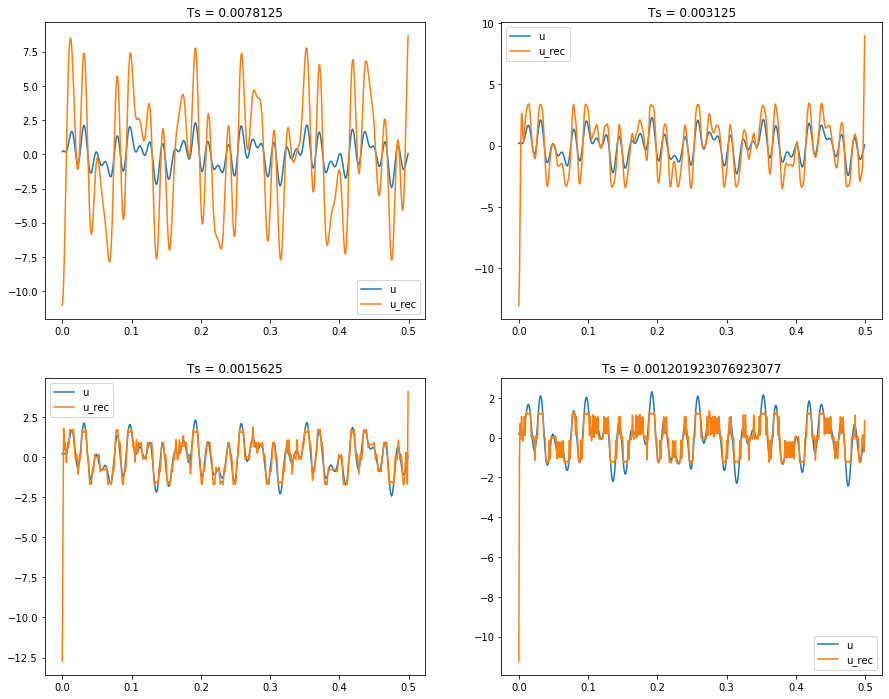

In [56]:
plt.figure(figsize = (15, 12))
plt.subplot(2,2,1)
plt.title(f'Ts = {iaf_kernel_based_5_2_1.Ts}')
plt.plot(iaf_kernel_based_5_2_1.t, iaf_kernel_based_5_2_1.u , label = 'u')
plt.plot(iaf_kernel_based_5_2_1.t, iaf_kernel_based_5_2_1.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(2,2,2)
plt.title(f'Ts = {iaf_kernel_based_5_2_2.Ts}')
plt.plot(iaf_kernel_based_5_2_2.t, iaf_kernel_based_5_2_2.u , label = 'u')
plt.plot(iaf_kernel_based_5_2_2.t, iaf_kernel_based_5_2_2.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(2,2,3)
plt.title(f'Ts = {iaf_kernel_based_5_2_3.Ts}')
plt.plot(iaf_kernel_based_5_2_3.t, iaf_kernel_based_5_2_3.u , label = 'u')
plt.plot(iaf_kernel_based_5_2_3.t, iaf_kernel_based_5_2_3.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(2,2,4)
plt.title(f'Ts = {iaf_kernel_based_5_2_4.Ts}')
plt.plot(iaf_kernel_based_5_2_4.t, iaf_kernel_based_5_2_4.u , label = 'u')
plt.plot(iaf_kernel_based_5_2_4.t, iaf_kernel_based_5_2_4.u_rec, label = 'u_rec')
plt.legend()

plt.savefig('saved_images/Tss.png')

## Result

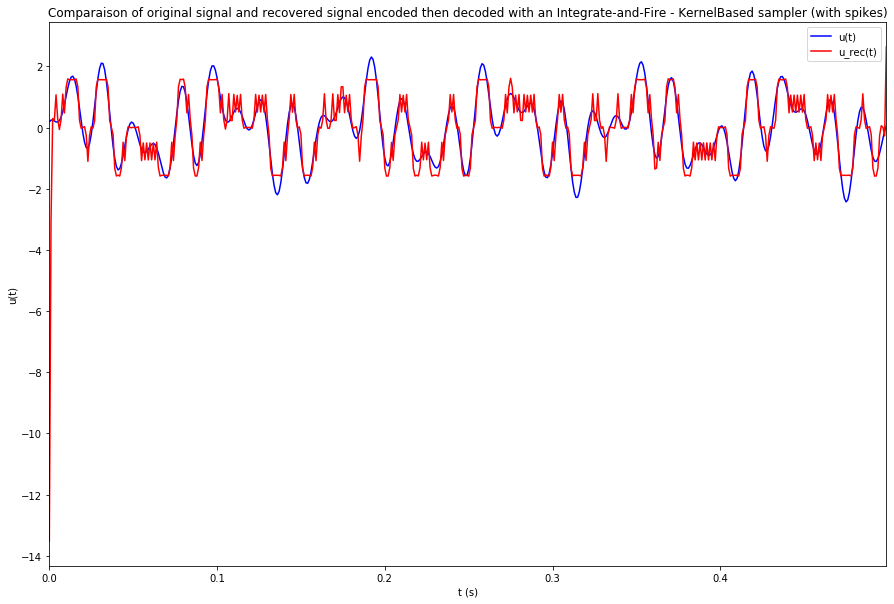

In [57]:
iaf_kernel_based_6 = IAF_KernelBased(alpha, theta, gamma, Ts)
iaf_kernel_based_6.setSignal(t5, u5, dt5)
iaf_kernel_based_6.encode()
iaf_kernel_based_6.decode(gamma = 1, Ts = Ts/10)

iaf_kernel_based_6.plotSignalAndRecoveredSignal()

plt.savefig('saved_images/result.png')

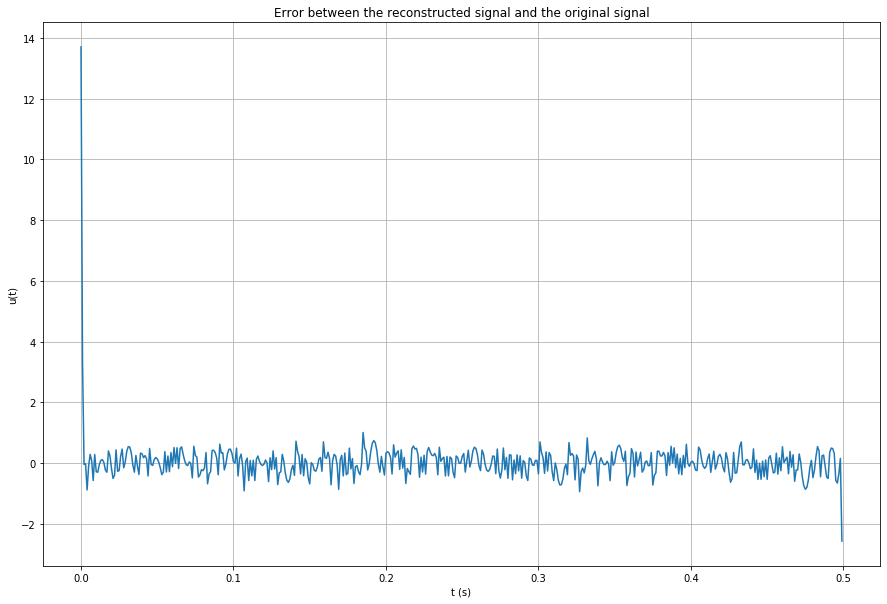

In [58]:
iaf_kernel_based_6.plotError()

In [59]:
print(f'Number of spikes : {iaf_kernel_based_6.getNumberOfSpikes()}')
print(f'Mean squared error : {iaf_kernel_based_6.computeMeanSquaredError()}')

Number of spikes : 256
Mean squared error : 267.7665420957311
